In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('Random_movie_review.csv')

In [3]:
df.head()

text  label
0  I always wrote this series off as being a comp...      0
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0
2  This movie was so poorly written and directed ...      0
3  The most interesting thing about Miryang (Secr...      1
4  when i first read about "berlin am meer" i did...      0

In [4]:
df=df.drop('label',axis=1)

In [5]:
df

text
0     I always wrote this series off as being a comp...
1     1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...
2     This movie was so poorly written and directed ...
3     The most interesting thing about Miryang (Secr...
4     when i first read about "berlin am meer" i did...
...                                                 ...
4995  This is the kind of picture John Lassiter woul...
4996  A MUST SEE! I saw WHIPPED at a press screening...
4997  NBC should be ashamed. I wouldn't allow my chi...
4998  This movie is a clumsy mishmash of various gho...
4999  Formula movie about the illegitimate son of a ...

[5000 rows x 1 columns]

In [8]:
df.duplicated().sum()

5

In [6]:
df=df.drop_duplicates()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4995 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4995 non-null   object
dtypes: object(1)
memory usage: 78.0+ KB


In [8]:
df.describe()


text
count                                                4995
unique                                               4995
top     I always wrote this series off as being a comp...
freq                                                    1

In [9]:
!pip install -q pyspellchecker
!pip install -q spell-checker

ERROR: Cannot install spell-checker==1.1.0, spell-checker==1.2.0, spell-checker==1.2.5, spell-checker==1.3.0, spell-checker==1.4.0, spell-checker==1.5.0, spell-checker==1.6.0 and spell-checker==1.6.1 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [10]:

from tqdm.notebook import tqdm

In [11]:
import nltk
from spellchecker import SpellChecker
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [12]:
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
import random

In [13]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\praga\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\praga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
languages = stopwords.fileids()
print("Number of supported languages:", len(languages))
print("Supported languages:", languages)

Number of supported languages: 29
Supported languages: ['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [15]:
!pip install -q langdetect

In [16]:
from langdetect import detect

def detect_language(text):
    try:
        lang = detect(text)
        return lang
    except:
        return None

df['Language'] = df['text'].apply(detect_language)

In [17]:
df

text Language
0     I always wrote this series off as being a comp...       en
1     1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...       en
2     This movie was so poorly written and directed ...       en
3     The most interesting thing about Miryang (Secr...       en
4     when i first read about "berlin am meer" i did...       en
...                                                 ...      ...
4995  This is the kind of picture John Lassiter woul...       en
4996  A MUST SEE! I saw WHIPPED at a press screening...       en
4997  NBC should be ashamed. I wouldn't allow my chi...       en
4998  This movie is a clumsy mishmash of various gho...       en
4999  Formula movie about the illegitimate son of a ...       en

[4995 rows x 2 columns]

In [18]:
spell=SpellChecker()

In [19]:
def label_sentiment(x:float):
    if x < -0.05 : return 'negative'
    if x > 0.35 : return 'positive'
    return 'neutral'

In [20]:
sia = SIA()

In [21]:
df['sentiment'] = [sia.polarity_scores(x)['compound'] for x in tqdm(df['text'])]
df['overall_sentiment'] = df['sentiment'].apply(label_sentiment);

  0%|          | 0/4995 [00:00<?, ?it/s]

In [22]:
df.head(10)

text Language  sentiment  \
0  I always wrote this series off as being a comp...       en     0.9935   
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...       en    -0.1618   
2  This movie was so poorly written and directed ...       en    -0.9683   
3  The most interesting thing about Miryang (Secr...       en    -0.9947   
4  when i first read about "berlin am meer" i did...       en    -0.6673   
5  I saw this film on September 1st, 2005 in Indi...       en     0.9940   
6  I saw a screening of this movie last night. I ...       en     0.9940   
7  William Hurt may not be an American matinee id...       en     0.9688   
8  IT IS A PIECE OF CRAP! not funny at all. durin...       en    -0.9922   
9  I'M BOUT IT(1997)<br /><br />Developed & publi...       en     0.7949   

  overall_sentiment  
0          positive  
1          negative  
2          negative  
3          negative  
4          negative  
5          positive  
6          positive  
7          positive  
8          negative  
9          positive

In [23]:
df['overall_sentiment'].value_counts()

overall_sentiment
positive    3084
negative    1724
neutral      187
Name: count, dtype: int64

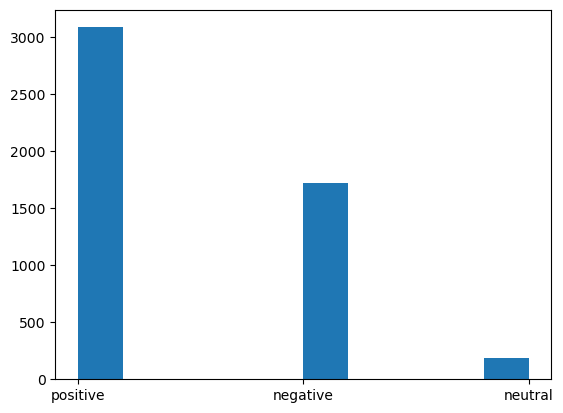

<Figure size 5000x5000 with 0 Axes>

In [25]:
plt.hist(df['overall_sentiment'])
plt.figure(figsize=(50,50))
plt.show()

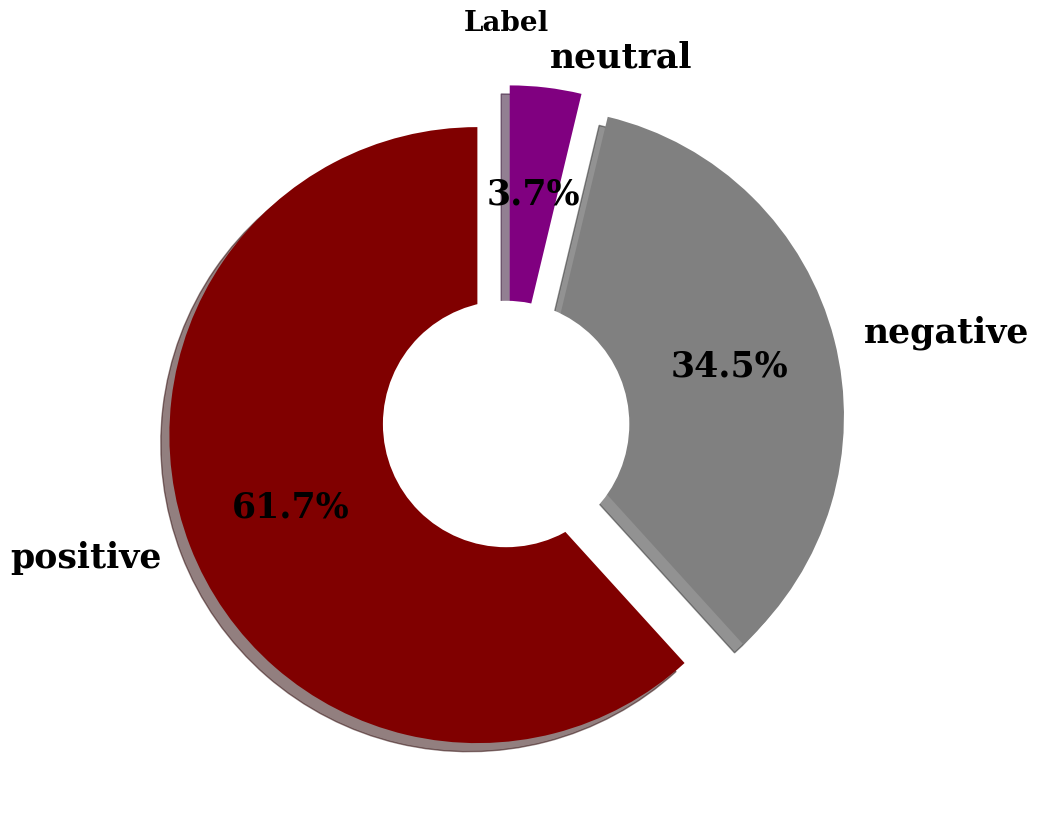

In [26]:
label_data = df['overall_sentiment'].value_counts()

explode = (0.1, 0.1, 0.1)
plt.figure(figsize=(14, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['maroon', 'grey', 'purple'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 90,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='black')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Label', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

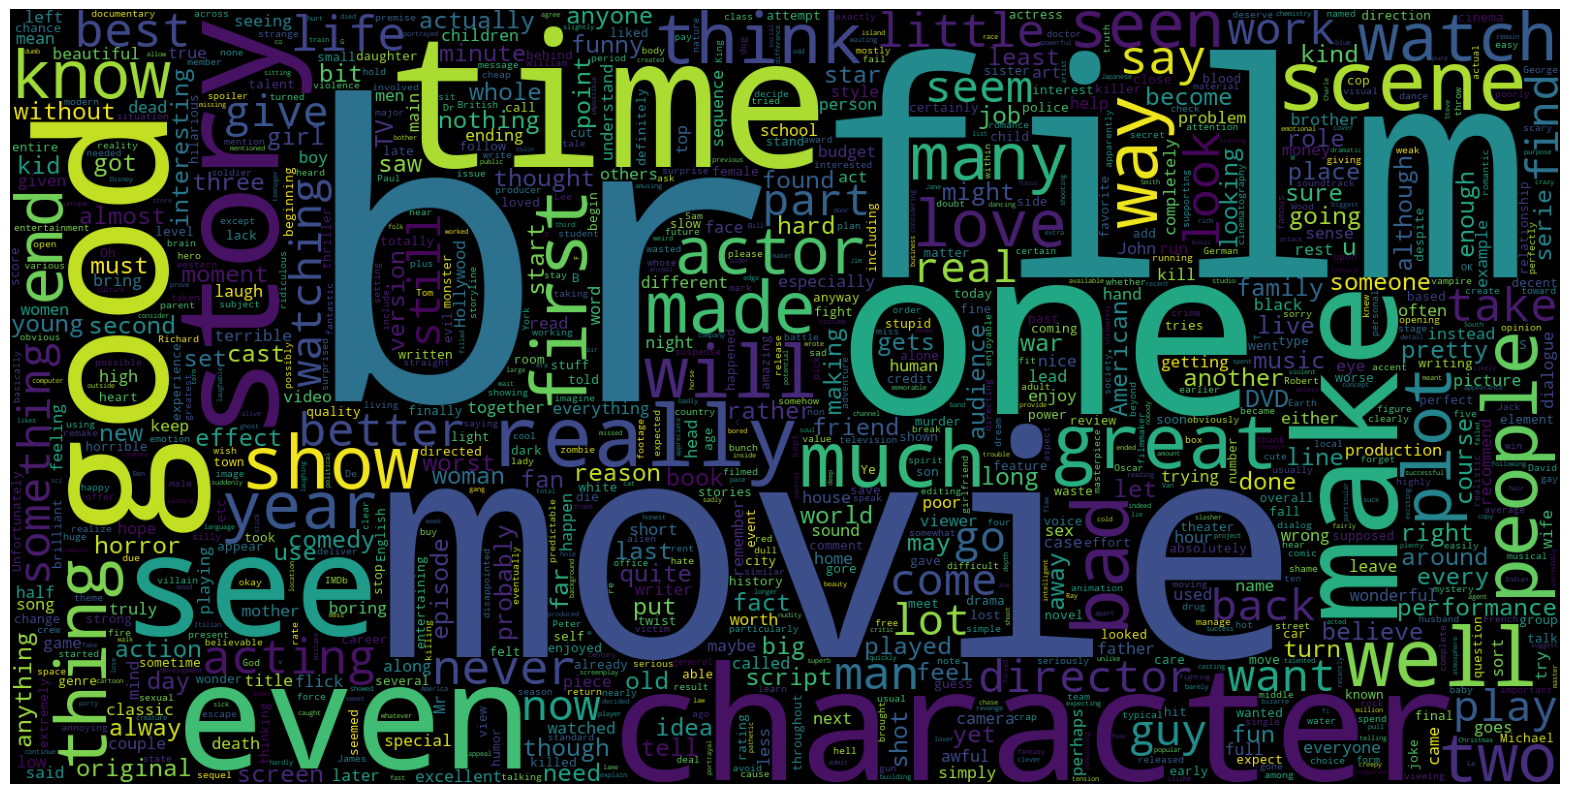

In [24]:
from wordcloud import WordCloud
data = df['text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

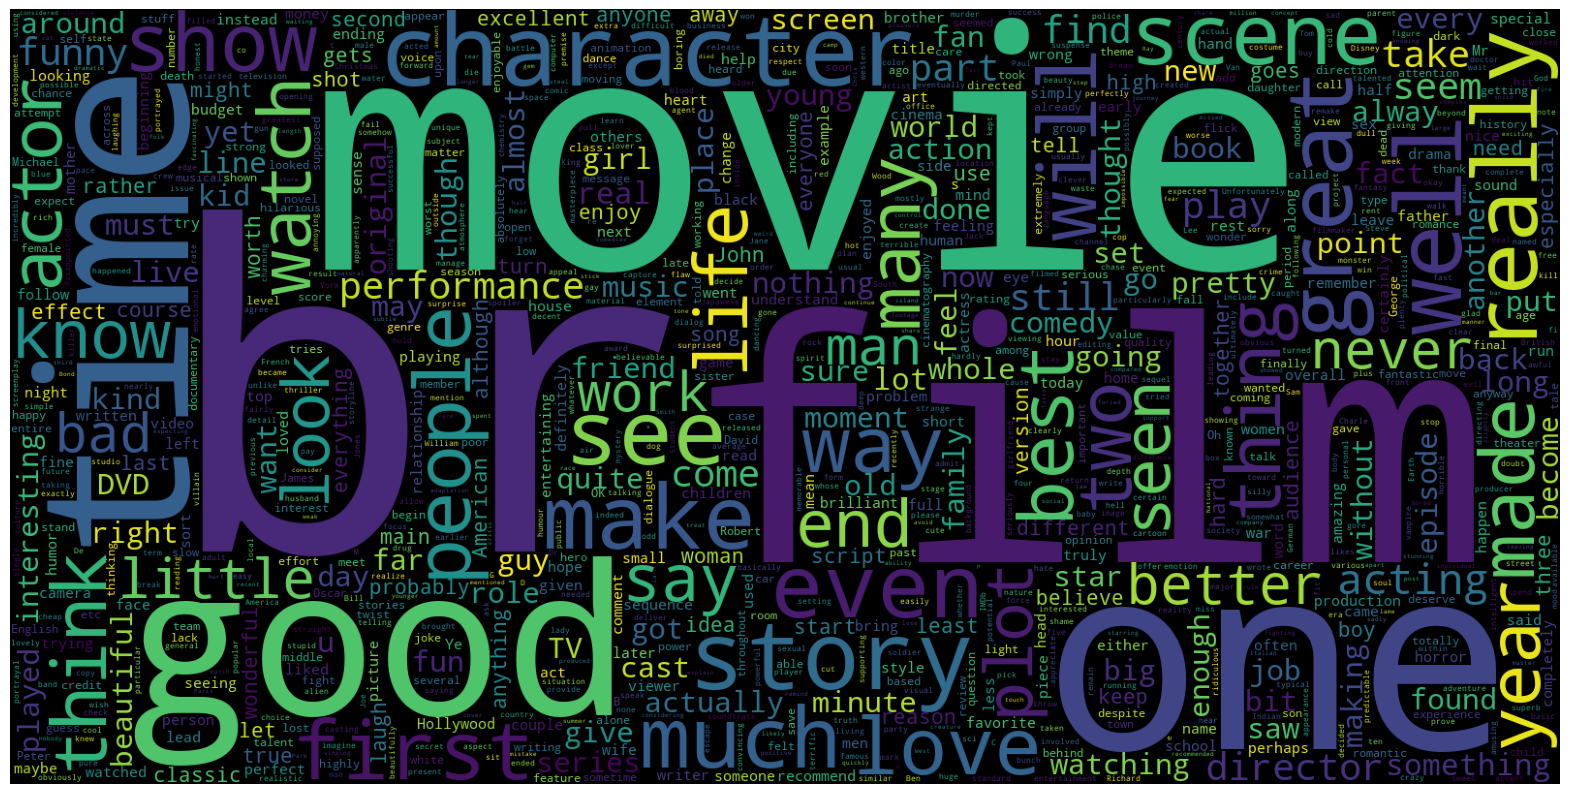

In [27]:
data = df[df['overall_sentiment']=="positive"]['text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

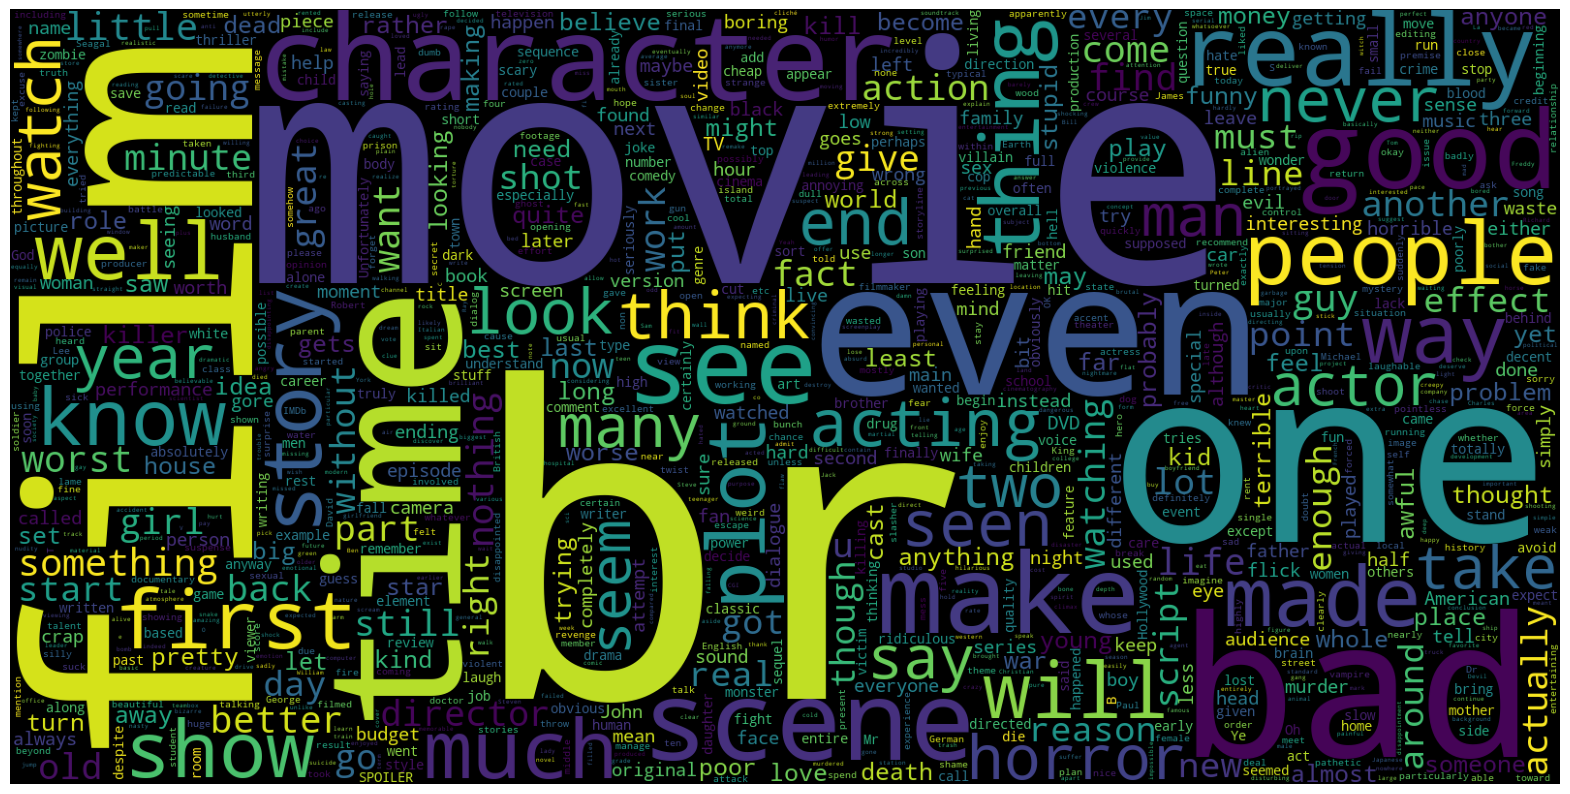

In [28]:
data = df[df['overall_sentiment']=="negative"]['text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

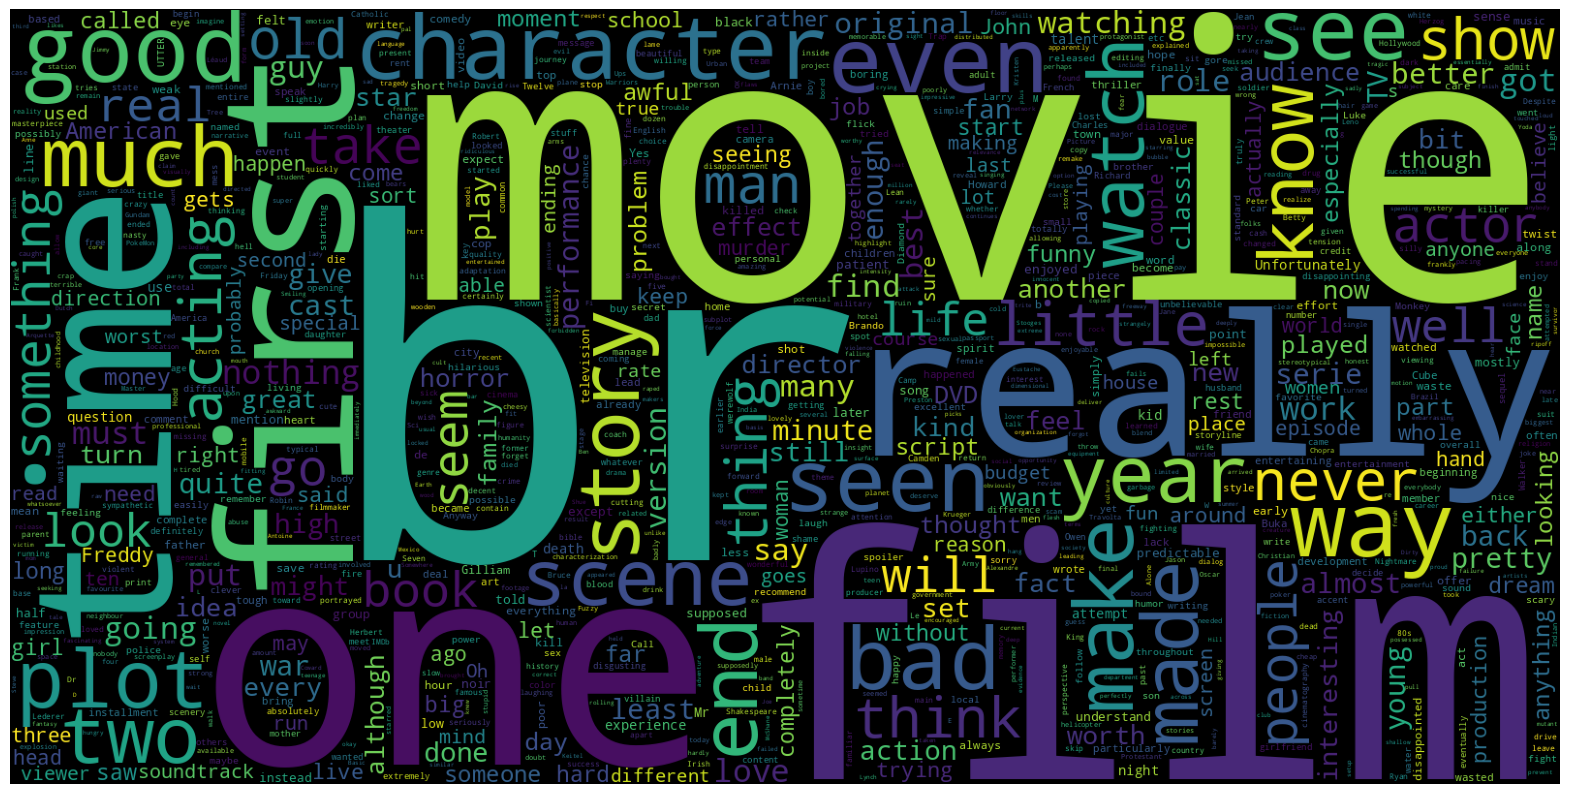

In [59]:
data = df[df['overall_sentiment']=="neutral"]['text']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()